In [46]:
# Testing your installation
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


print('TensorFlow: ', tf.__version__)
print('Keras', keras.__version__)
print("numpy :" , np.__version__)

TensorFlow:  2.12.0
Keras 2.12.0
numpy : 1.22.4


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
df = pd.read_csv("/content/drive/MyDrive/churn_modeling.csv")

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [131]:
df2 = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

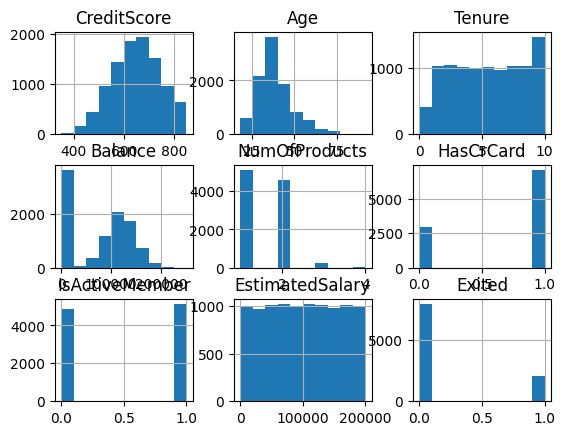

In [55]:
df2.hist()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Tenure'),
  Text(3, 0, 'NumOfProducts'),
  Text(4, 0, 'HasCrCard'),
  Text(5, 0, 'IsActiveMember')])

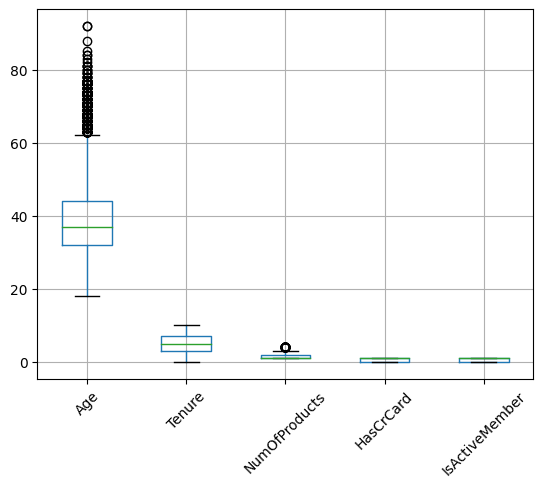

In [62]:
df2.drop(['Balance','EstimatedSalary','CreditScore','Exited'], axis= 1).boxplot()
plt.xticks(rotation=45)

(array([1, 2]), [Text(1, 0, 'Balance'), Text(2, 0, 'EstimatedSalary')])

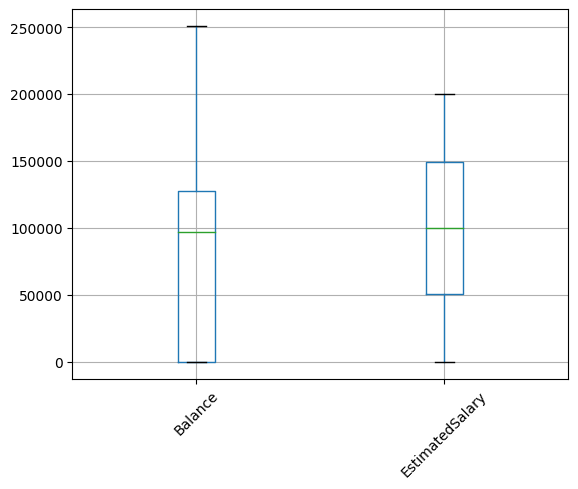

In [72]:
cols = df2.columns
df2.drop([str(x) for x in cols if x not in ['Balance','EstimatedSalary']], axis= 1).boxplot()
plt.xticks(rotation=45)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f87bdd515a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87bdd50fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87bdd53f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87bdaf19f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87bdaf29e0>],
 'means': []}

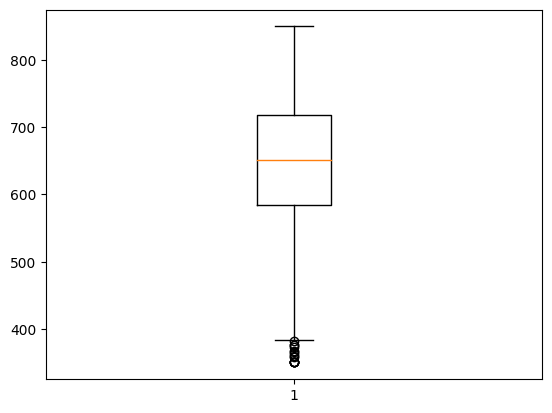

In [136]:
plt.boxplot(df2.CreditScore)

In [147]:
# clean outliers
age_q25, age_q75 = df2.Age.quantile(0.25), df2.Age.quantile(0.75)
age_IQR = age_q75 - age_q25
cs_q25, cs_q75 = df2.CreditScore.quantile(0.25), df2.CreditScore.quantile(0.75)
cs_IQR = cs_q75 - cs_q25

age_lower, age_upper = age_q25 - (1.5 * age_IQR), age_q75 + (1.5 * age_IQR)
cs_lower, cs_upper = cs_q25 - (1.5 * cs_IQR), cs_q75 + (1.5 * cs_IQR)
df2.drop(df2[(df2['CreditScore'] >= cs_upper) | (df2['CreditScore'] <= cs_lower)].index, axis = 0, inplace=True)
df2.drop(df2[(df2['Age'] >= age_upper) | (df2['Age'] <= age_lower)].index, axis = 0, inplace=True)

<Axes: >

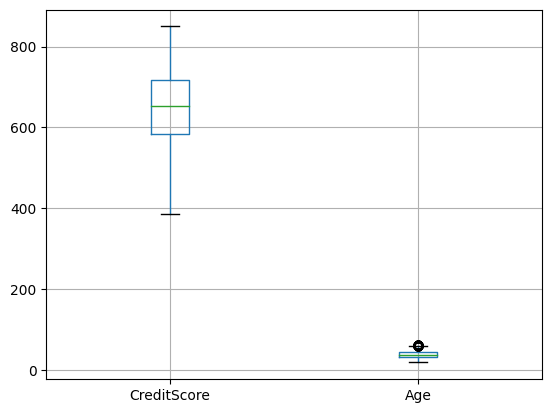

In [159]:
df2.loc[:,['CreditScore','Age']].boxplot()

In [161]:
df2.sort_index(inplace=True)
df2.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

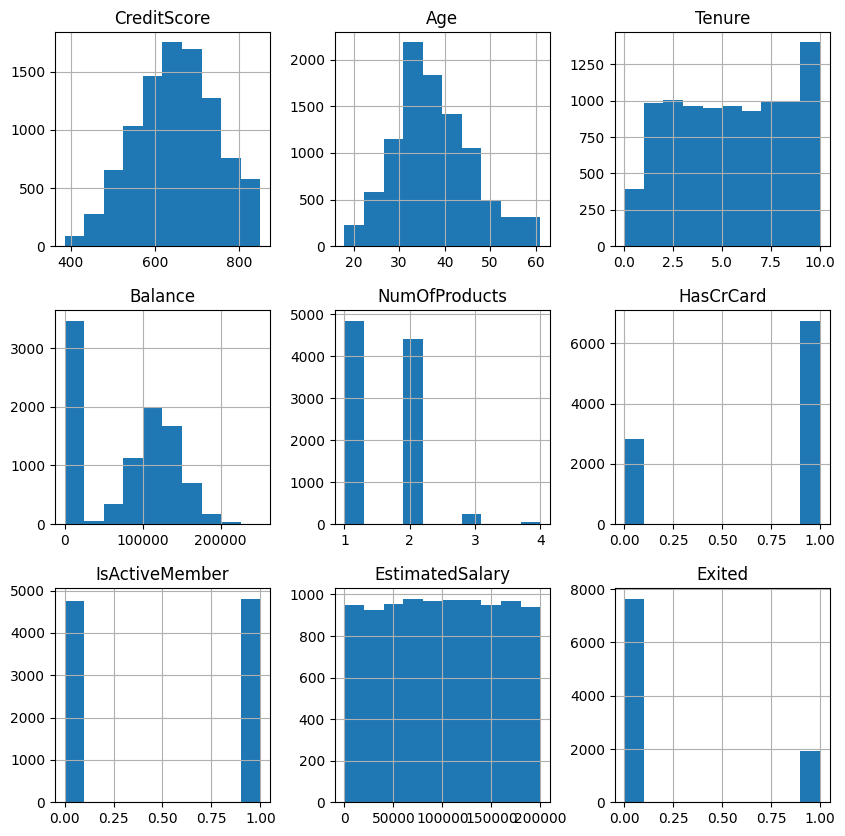

In [168]:
df2.hist(figsize=(10,10))
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

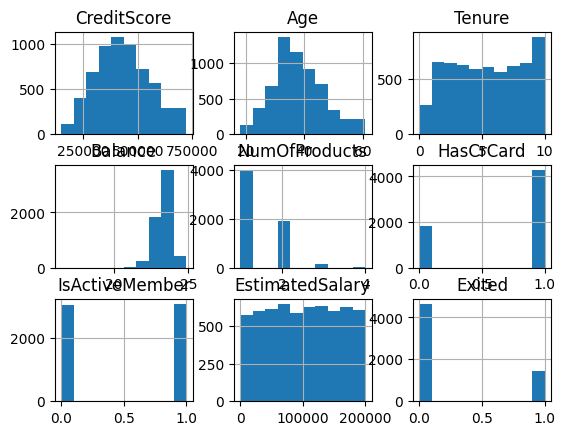

In [374]:
df3 = df2.copy()
# df3['Balance'] = np.log(df3.Balance.mean() - df3['Balance'])
df3['Balance'] = np.power(df3['Balance'], 2)
df3['Balance'] = np.log(df3['Balance'])
df3['CreditScore'] = np.power(df3['CreditScore'], 2)
df3.drop(df3[np.abs(df3['Balance']) == np.inf].index, inplace=True)
df3.hist()

In [375]:
print(df3.shape)
df3.describe()

(6112, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000
mean,433754.162467,37.963187,4.976931,23.316996,1.386616,0.700262,0.502618,100767.401474,0.237238
std,125299.170806,8.725535,2.905362,0.562334,0.576276,0.458181,0.500034,57390.874377,0.425424
min,148996.000000,18.000000,0.000000,16.468965,1.000000,0.000000,0.000000,11.580000,0.000000
25%,342225.000000,32.000000,2.000000,23.029195,1.000000,0.000000,0.000000,51937.852500,0.000000
50%,425104.000000,37.000000,5.000000,23.387704,1.000000,1.000000,1.000000,101209.465000,0.000000
75%,515524.000000,43.000000,7.250000,23.692320,2.000000,1.000000,1.000000,149686.530000,0.000000
max,722500.000000,61.000000,10.000000,24.865604,4.000000,1.000000,1.000000,199970.740000,1.000000


In [376]:
df3["Geography"].value_counts()
# i will encode this column and gender column to be numeric

France     2489
Germany    2407
Spain      1216
Name: Geography, dtype: int64

In [377]:
from sklearn.preprocessing import OneHotEncoder

In [378]:
df3 = pd.get_dummies(df3, columns=['Geography'], prefix = ['Geography'] , drop_first=True)
df3 = pd.get_dummies(df3, columns=['Gender'], prefix = ['Gender'] , drop_first=True)
print(df3.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1       369664   41       1  22.672564              1          0   
2       252004   42       8  23.961614              3          1   
4       722500   43       2  23.480294              1          1   
5       416025   44       8  23.283618              2          1   
8       251001   44       4  23.727884              2          0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
4               1         79084.10       0                  0   
5               0        149756.71       1                  0   
8               1         74940.50       0                  0   

   Geography_Spain  Gender_Male  
1                1            0  
2                0            0  
4                1            0  
5                1            1  
8                0            

In [379]:
df3.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,369664,41,1,22.672564,1,0,1,112542.58,0,0,1,0


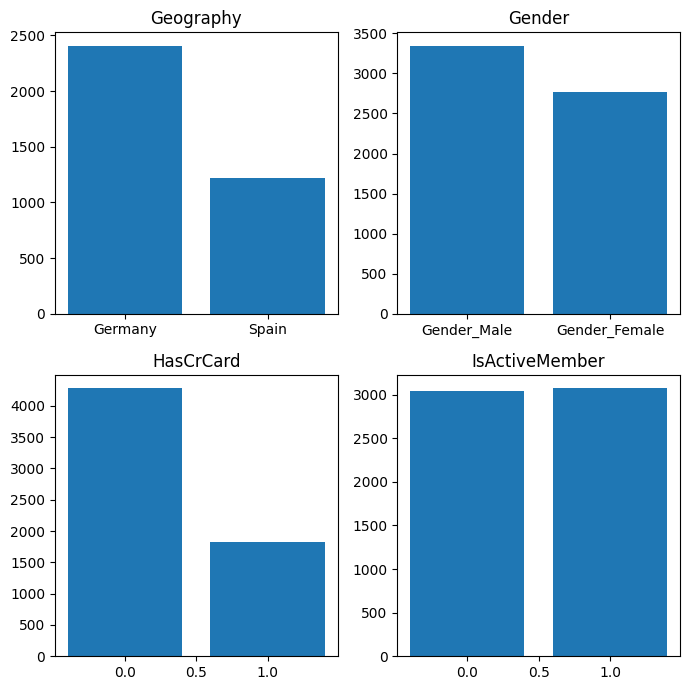

In [380]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].bar(['Germany','Spain'], [df3['Geography_Germany'].sum(),df3['Geography_Spain'].sum()])
ax[0,0].set_title('Geography')
ax[0,1].bar(['Gender_Male','Gender_Female'], [df3['Gender_Male'].sum(), (df3['Gender_Male'] != 1).sum()])
ax[0,1].set_title('Gender')
ax[1,0].bar(df3['HasCrCard'].unique(), df3['HasCrCard'].value_counts())
ax[1,0].set_title('HasCrCard')
ax[1,1].bar(df3['IsActiveMember'].unique() , df3['IsActiveMember'].value_counts())
ax[1,1].set_title('IsActiveMember')
fig.tight_layout()
plt.show()

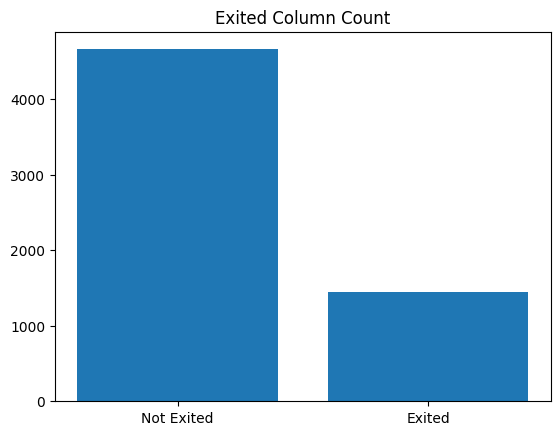

In [381]:
plt.bar(['Not Exited','Exited'], df3['Exited'].value_counts())
plt.title("Exited Column Count")
plt.show()

In [382]:
df3['Exited'].value_counts()

0    4662
1    1450
Name: Exited, dtype: int64

In [383]:
x = df3.drop(['Exited'], axis=1)

In [384]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1,369664,41,1,22.672564,1,0,1,112542.58,0,1,0
2,252004,42,8,23.961614,3,1,0,113931.57,0,0,0
4,722500,43,2,23.480294,1,1,1,79084.10,0,1,0
5,416025,44,8,23.283618,2,1,0,149756.71,0,1,1
8,251001,44,4,23.727884,2,0,1,74940.50,0,0,1


In [385]:
y = df3["Exited"]
y.head()

1    0
2    1
4    0
5    1
8    0
Name: Exited, dtype: int64

In [388]:
from imblearn.over_sampling import SMOTE
X_new, y_new = SMOTE().fit_resample(x,y)

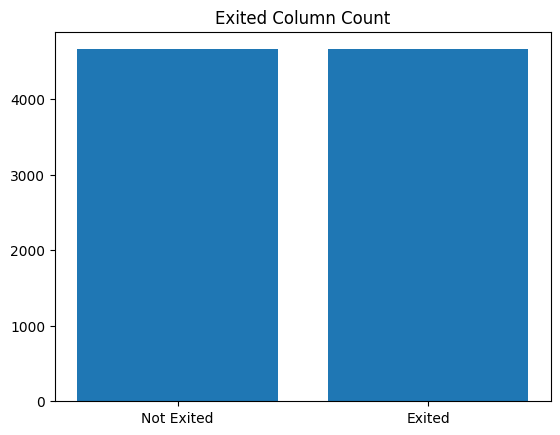

In [389]:
plt.bar(['Not Exited','Exited'], y_new.value_counts())
plt.title("Exited Column Count")
plt.show()

In [390]:
X_new.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [391]:
import numpy as np
from sklearn.model_selection import train_test_split

In [392]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (7459, 11)
x_test shape:  (1865, 11)
y_train shape:  (7459,)
y_test shape:  (1865,)


In [393]:
x_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6255,519991,43,3,23.053866,1,0,0,133000.643920,0,0,0
7839,390223,45,2,22.549095,1,0,0,167484.780678,0,0,0
7268,722500,42,6,22.907578,2,0,1,57193.391566,1,0,1


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>],
       [<Axes: title={'center': 'Geography_Germany'}>,
        <Axes: title={'center': 'Geography_Spain'}>, <Axes: >]],
      dtype=object)

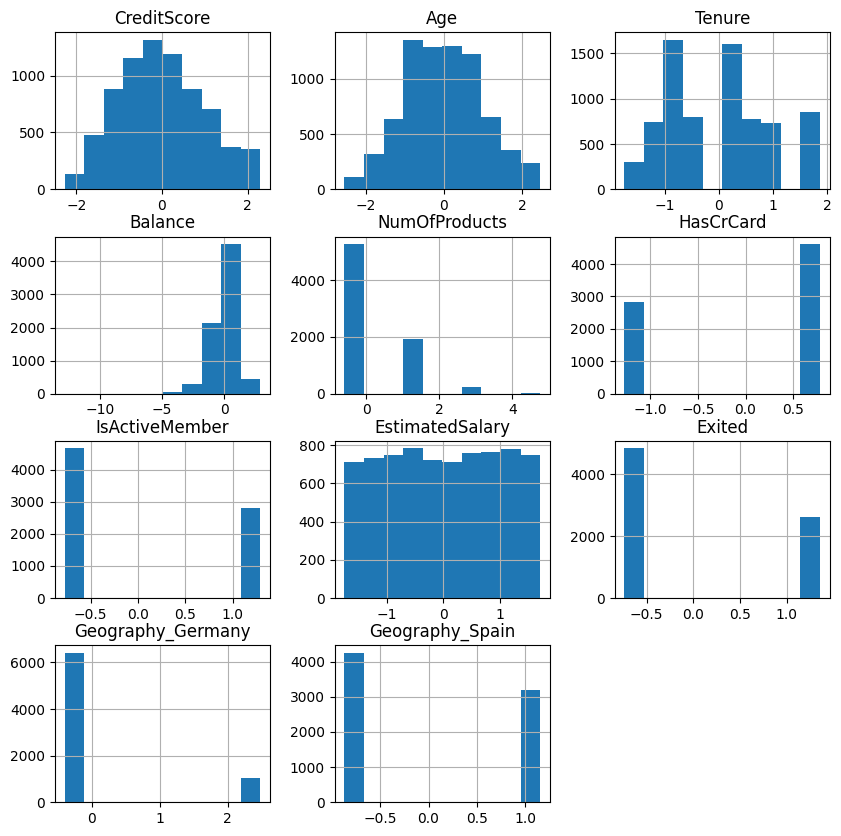

In [394]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

pd.DataFrame(x_train, columns=df3.columns[:-1]).hist(figsize=(10,10))